# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [ ]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import precision_recall_fscore_support
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model
import matplotlib.pyplot as plt 

# YOUR CODE HERE
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [ ]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = "/content/drive/My Drive/Colab Notebooks/pictures/train"
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/pictures/val'
test_data_dir       = '/content/drive/My Drive/Colab Notebooks/pictures/test'

epochs = 50
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)


train_generator = datagen.flow_from_directory(train_data_dir, 
                                              batch_size= batch_size, 
                                              target_size=(img_width, img_height),
                                              class_mode="categorical")

valid_generator = datagen.flow_from_directory(validation_data_dir, 
                                              batch_size= batch_size,
                                              target_size=(img_width, img_height),
                                              class_mode="categorical")

test_generator  = datagen.flow_from_directory(test_data_dir, 
                                              batch_size= batch_size,
                                              target_size=(img_width, img_height))


Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [ ]:


# define the input shape of Convolutional Neural Network
input_shape = (224, 224, 3)

# define the Convolutional Neural Network
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape= (224, 224, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',use_bias=True))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size= (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu', use_bias=True))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  mode = 'max',
                                                  patience = 10,
                                                  restore_best_weights = True)

In [ ]:
# Compiling the model and training including the files of compile and fit

model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

#Train the model with training and validation set
history_1 = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks = [early_stopping],
                    verbose = 1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
261/261 [==============================] - 801s 3s/step - loss: 0.6209 - accuracy: 0.8123 - val_loss: 0.6476 - val_accuracy: 0.8147
Epoch 2/50
261/261 [==============================] - 28s 109ms/step - loss: 0.0291 - accuracy: 0.9921 - val_loss: 0.7531 - val_accuracy: 0.8254
Epoch 3/50
261/261 [==============================] - 29s 109ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.6855 - val_accuracy: 0.8520
Epoch 4/50
261/261 [==============================] - 28s 109ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 1.0896 - val_accuracy: 0.8563
Epoch 5/50
261/261 [==============================] - 29s 109ms/step - loss: 2.3634e-05 - accuracy: 1.0000 - val_loss: 1.1857 - val_accuracy: 0.8628
Epoch 6/50
261/261 [==============================] - 29s 110ms/step - loss: 6.5966e-06 - accuracy: 1.0000 - val_loss: 1.1576 - val_accuracy: 0.8678
Epoch 7/50
261/261 [==============================] - 29s 111ms/step - loss: 3.2936e-06 - accuracy: 1.0000 - val_loss: 1.185

%Test

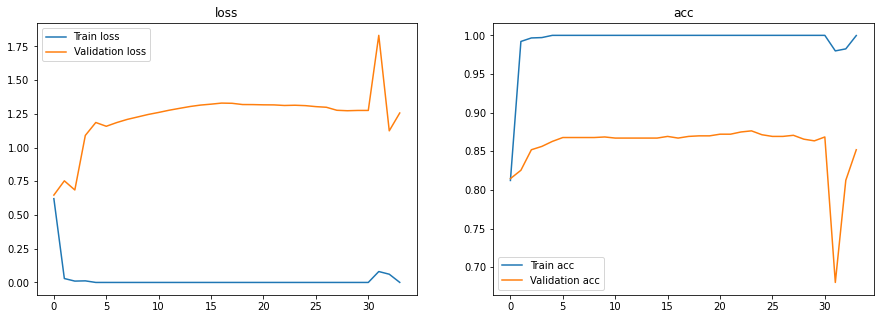

In [ ]:
show_final_history(history_1)

In [ ]:
# Test the model on a testing dataset
scores_1 = model.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("Accuracy:", scores_1[1])

Accuracy: 0.8254310488700867


In [ ]:
train_generator.reset()
valid_generator.reset()
test_generator.reset()

## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

model_l1 = Sequential()

# layer 1
model_l1.add(Conv2D(64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', use_bias=True))
model_l1.add(MaxPooling2D(pool_size=(2,2)))
             
# layer 2
model_l1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=True))
model_l1.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model_l1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.001)))
model_l1.add(MaxPooling2D(pool_size=(2,2)))

model_l1.add(Flatten())
model_l1.add(Dense(512, activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.001)))
model_l1.add(Dense(10, activation='softmax', use_bias=True))

model_l1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
model_l1.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate = 0.0003), metrics=['accuracy'])

In [ ]:
history_l1 = model_l1.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks = [early_stopping],
                    verbose = 1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


261/261 [==============================] - 29s 111ms/step - loss: 12.6859 - accuracy: 0.7043 - val_loss: 3.1505 - val_accuracy: 0.8333
Epoch 2/50
261/261 [==============================] - 29s 109ms/step - loss: 2.4252 - accuracy: 0.9332 - val_loss: 2.7907 - val_accuracy: 0.8527
Epoch 3/50
261/261 [==============================] - 28s 109ms/step - loss: 2.1112 - accuracy: 0.9679 - val_loss: 2.6969 - val_accuracy: 0.8333
Epoch 4/50
261/261 [==============================] - 29s 109ms/step - loss: 2.0825 - accuracy: 0.9751 - val_loss: 2.5531 - val_accuracy: 0.8700
Epoch 5/50
261/261 [==============================] - 29s 109ms/step - loss: 1.9815 - accuracy: 0.9825 - val_loss: 2.4878 - val_accuracy: 0.8764
Epoch 6/50
261/261 [==============================] - 29s 109ms/step - loss: 1.9823 - accuracy: 0.9777 - val_loss: 2.6768 - val_accuracy: 0.8405
Epoch 7/50
261/261 [==============================] - 28s 109ms/step - loss: 1.9660 - accuracy: 0.9878 - val_loss: 2.3744 - val_accuracy: 0.

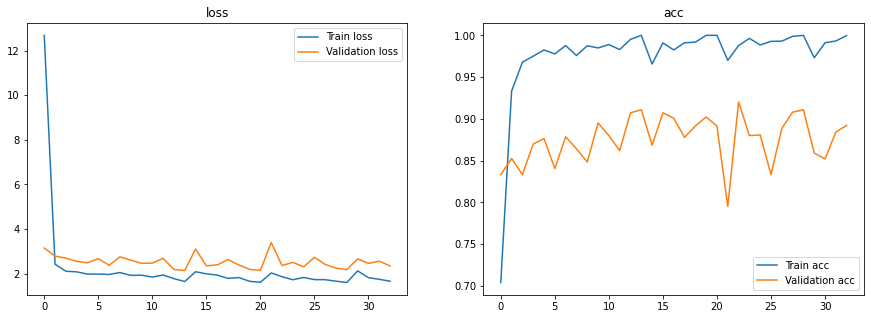

In [ ]:
show_final_history(history_l1)

In [ ]:
scores_l1 = model_l1.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
print("Accuracy of model with L1 regularization is :", scores_l1[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy of model with L1 regularization is : 0.8369252681732178


In [ ]:
train_generator.reset()
valid_generator.reset()
test_generator.reset()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

model_l2 = Sequential()

# layer 1
model_l2.add(Conv2D(64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', use_bias=True))
model_l2.add(MaxPooling2D(pool_size=(2,2)))
             
# layer 2
model_l2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=True))
model_l2.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model_l2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2(l=0.001)))
model_l2.add(MaxPooling2D(pool_size=(2,2)))

model_l2.add(Flatten())
model_l2.add(Dense(512, activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2(l=0.001)))
model_l2.add(Dense(10, activation='softmax', use_bias=True))

model_l2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
model_l2.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate= 0.0003), metrics=['accuracy'])

In [ ]:
history_l2 = model_l2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks = [early_stopping],
                    verbose = 1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


261/261 [==============================] - 30s 111ms/step - loss: 0.8723 - accuracy: 0.8379 - val_loss: 0.9828 - val_accuracy: 0.8534
Epoch 2/50
261/261 [==============================] - 29s 111ms/step - loss: 0.2769 - accuracy: 0.9811 - val_loss: 0.8015 - val_accuracy: 0.8527
Epoch 3/50
261/261 [==============================] - 28s 108ms/step - loss: 0.2168 - accuracy: 0.9914 - val_loss: 0.9208 - val_accuracy: 0.8384
Epoch 4/50
261/261 [==============================] - 28s 108ms/step - loss: 0.1925 - accuracy: 0.9911 - val_loss: 0.9389 - val_accuracy: 0.8477
Epoch 5/50
261/261 [==============================] - 29s 110ms/step - loss: 0.1878 - accuracy: 0.9916 - val_loss: 1.2891 - val_accuracy: 0.8060
Epoch 6/50
261/261 [==============================] - 29s 109ms/step - loss: 0.1408 - accuracy: 0.9969 - val_loss: 0.9108 - val_accuracy: 0.8427
Epoch 7/50
261/261 [==============================] - 29s 109ms/step - loss: 0.1005 - accuracy: 0.9976 - val_loss: 0.8797 - val_accuracy: 0.8

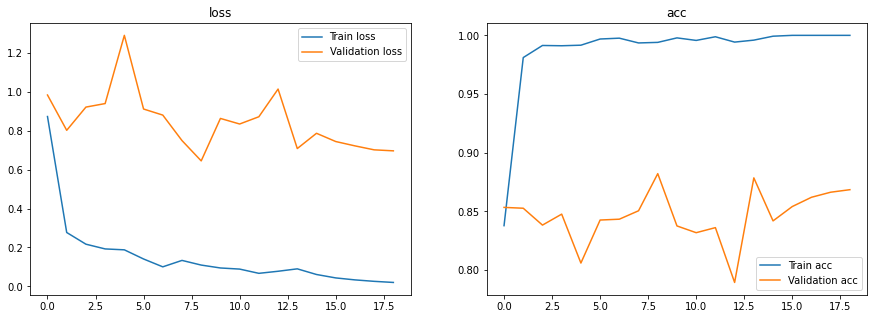

In [ ]:
show_final_history(history_l2)

In [ ]:
scores_l2 = model_l2.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
print("Accuracy of model with L2 regularization is : ", scores_l2[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy of model with L2 regularization is :  0.8139367699623108


In [ ]:
train_generator.reset()
valid_generator.reset()
test_generator.reset()

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [ ]:
from tensorflow.keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

# Fine-tune the model to fit our project  
model_rs = Sequential()
model_rs.add(conv_base)
model_rs.add(AveragePooling2D(pool_size=(7,7)))
model_rs.add(Flatten())
model_rs.add(Dense(256, activation='relu'))
model_rs.add(Dropout(0.5))
model_rs.add(Dense(10, activation='softmax'))

print(model_rs.summary())

for layer in conv_base.layers[143:]:      # Freezing last 3 layers
    layer.trainable = False

model_rs.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])

#Train the model with training and validation set
history_rs = model_rs.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks = [early_stopping],
                    verbose = 1
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 average_pooling2d_1 (Averag  (None, 1, 1, 2048)       0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


261/261 [==============================] - 57s 197ms/step - loss: 0.6381 - accuracy: 0.7931 - val_loss: 6.4853 - val_accuracy: 0.1034
Epoch 2/50
261/261 [==============================] - 51s 194ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 8.3524 - val_accuracy: 0.1034
Epoch 3/50
261/261 [==============================] - 51s 196ms/step - loss: 0.1242 - accuracy: 0.9641 - val_loss: 8.6995 - val_accuracy: 0.1034
Epoch 4/50
261/261 [==============================] - 52s 198ms/step - loss: 0.0287 - accuracy: 0.9919 - val_loss: 0.9613 - val_accuracy: 0.8082
Epoch 5/50
261/261 [==============================] - 52s 199ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.7528 - val_accuracy: 0.8649
Epoch 6/50
261/261 [==============================] - 52s 201ms/step - loss: 0.0334 - accuracy: 0.9911 - val_loss: 0.3679 - val_accuracy: 0.9361
Epoch 7/50
261/261 [==============================] - 52s 200ms/step - loss: 0.0846 - accuracy: 0.9773 - val_loss: 0.5696 - val_accuracy: 0.8

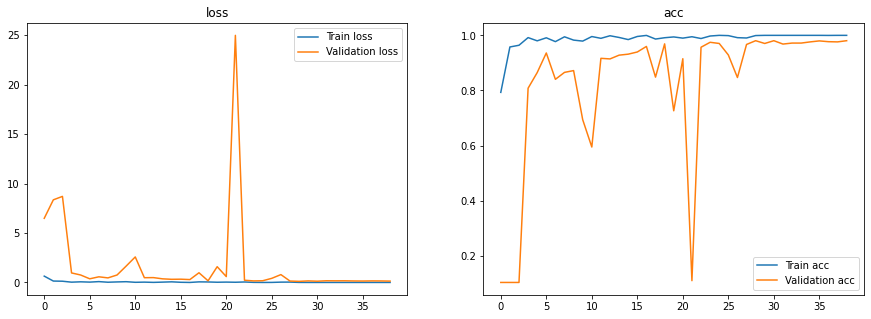

In [ ]:
show_final_history(history_rs)                                                                                              

In [ ]:
scores_rs = model_rs.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
scores_rs[1]

0.9612069129943848